In [2]:
import numpy as np
import pandas as pd
import os
import bz2
import nltk
#load the dataset
# df=pd.read_table('train.ft.txt/train.ft.txt')
# # print(df)
# # print(df.info())
# # print(df.shape)






# df.to_csv('train.csv', sep=',', encoding='utf-8', header=None,index = None)
# print(df.head())





file_path = os.path.join( "train.ft.txt.bz2")


data = []
with bz2.open(file_path, "rt", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split(" ", 1)
        if len(parts) == 2:
            label, text = parts
            label = label.replace("__label__", "")
            data.append((label, text))


df = pd.DataFrame(data, columns=["label", "text"])
df["label"] = df["label"].astype(int)


print(df.tail())




df["label"] = df["label"].map({1: 0, 2: 1})



from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

nltk.download("vader_lexicon")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("stopwords")

         label                                               text
3599995      1  Don't do it!!: The high chair looks great when...
3599996      1  Looks nice, low functionality: I have used thi...
3599997      1  compact, but hard to clean: We have a small ho...
3599998      1  what is it saying?: not sure what this book is...
3599999      2  Makes My Blood Run Red-White-And-Blue: I agree...


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [64]:
df.shape

(30000, 3)

In [18]:
import bz2
import re

import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [13]:
train_file = bz2.BZ2File("train.ft.txt.bz2")
test_file = bz2.BZ2File("test.ft.txt.bz2")

In [14]:
def load_extract(file):
    texts, labels = [], []
    for line in file:
        x = line.decode('utf-8')  # decode binary to string
        labels.append(int(x[9]) - 1)  # extract labels
        texts.append(x[10:].strip())  # extract texts
    print('Done !')
    return np.array(labels), texts

In [15]:
train_labels, train_texts = load_extract(train_file)
test_labels, test_texts = load_extract(test_file)

Done !
Done !


In [16]:
def clean_texts(texts):
    stwords = stopwords.words('english')
    temp_texts = []
    for i in range(len(texts)):
        text = re.sub('\d','0',texts[i]) #replace every digit with 0
        if 'www.' in text or 'http:' in text or 'https:' in text or '.com' in text: # remove links and urls
            text = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", " ", text)

        text = re.sub('[^a-zA-Z]', ' ', text) #anything which is not a character replace with whitespace char
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stwords] # remove stopwords
        text = ' '.join(text)
        temp_texts.append(text)
    print('--100%--Done !')
    return temp_texts

In [17]:
print('Processing Training data')
train_texts = clean_texts(train_texts)
print('\nProcessing Test data')
test_texts = clean_texts(test_texts)

Processing Training data
--100%--Done !

Processing Test data
--100%--Done !


<Axes: ylabel='count'>

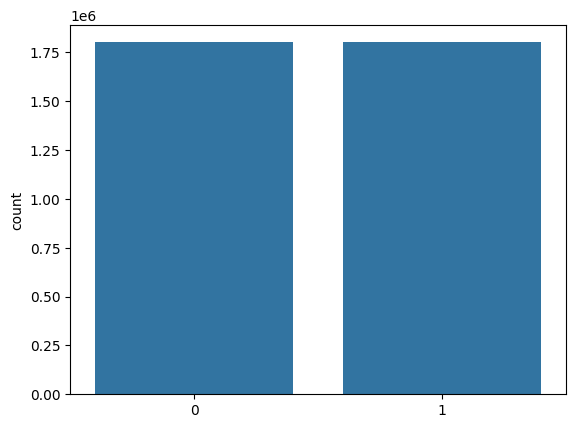

In [19]:
sns.countplot(x=train_labels)

In [20]:
print('Fitting data...')
count_vect = CountVectorizer()
count_vect.fit(train_texts) ; print('fit complete !')

print('tranforming training set...')
train_texts_vec = count_vect.transform(train_texts)

print('tranforming test set...')
test_texts_vec = count_vect.transform(test_texts)

Fitting data...
fit complete !
tranforming training set...
tranforming test set...


In [21]:
lr_model = LogisticRegression(n_jobs=-1, max_iter=150)
lr_model.fit(train_texts_vec, train_labels)

LogisticRegression(max_iter=150, n_jobs=-1)

In [22]:
pred_lr = lr_model.predict(test_texts_vec)

In [23]:
print('Accuracy:', accuracy_score(test_labels, pred_lr))

Accuracy: 0.90044


In [48]:
sample = test_texts[8]
print(sample)

sample_vec = count_vect.transform([sample])
pred = lr_model.predict(sample_vec)
print('\npredicted label:',pred[0])
print('actual label:', test_labels[100])

unique weird orientalia exotic tales orient dr shen fu weird tales magazine reprint elixir life grants immortality price tired modern authors sound alike antidote owen palette loaded splashes chinese japanese colours marvelous

predicted label: 1
actual label: 0


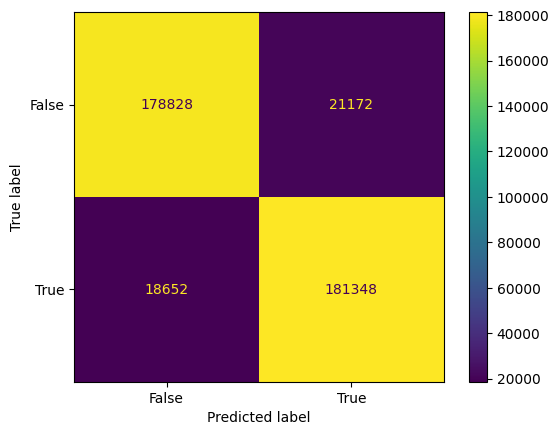

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(test_labels,pred_lr)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, classification_report
print("\t\tClassification Report:\n\n",classification_report(test_labels,pred_lr))

		Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.89      0.90    200000
           1       0.90      0.91      0.90    200000

    accuracy                           0.90    400000
   macro avg       0.90      0.90      0.90    400000
weighted avg       0.90      0.90      0.90    400000



In [50]:

from textblob import TextBlob

def analyze_sentiment(test_texts):
    analysis = TextBlob(test_texts)

    # Get polarity and subjectivity
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity

    # Determine sentiment
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, polarity, subjectivity

text = input("Enter text to analyze sentiment: ")
sentiment, polarity, subjectivity = analyze_sentiment(text)
print(f"Sentiment: {sentiment}")
print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")

Enter text to analyze sentiment: works fine maha energy better check maha energy website powerex mh c f charger works minutes rapid charge option slower charge better batteries mah batteries
Sentiment: Positive
Polarity: 0.47222222222222227
Subjectivity: 0.5


In [53]:
results_df = pd.DataFrame({'actual_label': test_labels, 'predicted_label': pred_lr})

accuracy_by_label = results_df.groupby('actual_label').apply(lambda x: accuracy_score(x['actual_label'], x['predicted_label']))

print("Accuracy by Actual Label:")
print(accuracy_by_label)

Accuracy by Actual Label:
actual_label
0    0.89414
1    0.90674
dtype: float64


/tmp/ipython-input-637329969.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_label = results_df.groupby('actual_label').apply(lambda x: accuracy_score(x['actual_label'], x['predicted_label']))


In [62]:
import pandas as pd
import re
import nltk
import bz2
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

# NLTK setup
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase, remove special characters
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Load only 1000 lines
data = []
with bz2.open("train.ft.txt.bz2", "rt", encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i >= 30000:
            break
        label, text = line.strip().split(" ", 1)
        sentiment = 1 if label == '__label__2' else 0
        data.append((text, sentiment))

df = pd.DataFrame(data, columns=["text", "label"])
df["clean_text"] = df["text"].apply(clean_text)

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean_text"])
y = df["label"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Save model & vectorizer
joblib.dump(model, "model.pkl")
joblib.dump(tfidf, "tfidf.pkl")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Accuracy: 0.8649166666666667
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.85      0.86      5714
    Positive       0.87      0.88      0.87      6286

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



['tfidf.pkl']